# Signal check


> notebook to compare signal vs. non-signal based workflows for viral genome assembly

## Prepare the data

* download the complete ebola genomes from RefSeq

In [1]:
!ncbi-genome-download --format fasta --assembly-level complete --fuzzy-genus --genus ebola viral -o tmp/

* download the Ebola (metagenome library prep) Nanopore data from the [artic data releases](http://artic.network/protocol_validation_2019.html)

In [2]:
!wget http://artic.s3.climb.ac.uk/run-folders/EBOV_Metagenomics.tar.gz --directory-prefix=tmp/
!tar -xvf tmp/EBOV_Metagenomics.tar.gz -C tmp/ --strip-components=1

mkdir: cannot create directory ‘tmp’: File exists
--2019-09-27 11:29:38--  http://artic.s3.climb.ac.uk/run-folders/EBOV_Metagenomics.tar.gz
Resolving artic.s3.climb.ac.uk (artic.s3.climb.ac.uk)... 137.205.52.6
Connecting to artic.s3.climb.ac.uk (artic.s3.climb.ac.uk)|137.205.52.6|:80... connected.
HTTP request sent, awaiting response... 
  HTTP/1.1 200 OK
  Server: nginx/1.14.0
  Date: Fri, 27 Sep 2019 10:29:38 GMT
  Content-Type: application/gzip
  Content-Length: 1070346070
  Connection: keep-alive
  Accept-Ranges: bytes
  Last-Modified: Tue, 03 Sep 2019 15:29:47 GMT
  ETag: "6e2449545dc6d1ac030505b880132e29-8"
  x-amz-meta-s3cmd-attrs: atime:1567522299/ctime:1567522360/gid:1000/gname:artic/md5:eb30cd588722793c39455ceb97898874/mode:33188/mtime:1567522310/uid:1000/uname:artic
  x-amz-request-id: tx00000000000000001128c-005d8de492-358ae44f-s3-warwick
Length: 1070346070 (1021M) [application/gzip]
Saving to: ‘tmp/EBOV_Metagenomics.tar.gz’

EBOV_Metagenomics.t 100%[===================>]  

* demux the reads with qcat:

In [3]:
!cat tmp/fastq_pass/*.fastq | qcat -b tmp/demuxed_reads

Adapters detected in 78316 of 81295 reads
  RPB004/RLB001  78316: |  ################### |  96.34 %
           none   2979: |                      |   3.66 %
Barcodes detected in 78316 of 81295 adapters
      barcode01      2: |                      |   0.00 %
      barcode02      2: |                      |   0.00 %
      barcode04      1: |                      |   0.00 %
      barcode07     10: |                      |   0.01 %
      barcode08     25: |                      |   0.03 %
      barcode09  15550: |                  ### |  19.13 %
      barcode10  22397: |                ##### |  27.55 %
      barcode11  21887: |                ##### |  26.92 %
      barcode12     24: |                      |   0.03 %
     barcode12a  18418: |                 #### |  22.66 %
           none   2979: |                      |   3.66 %
Demultiplexing finished in 47.55s


> we want barcodes 9, 10 and 11 (9=Mayinga,10=Kikwit,11=Makona)

## Evaluating de-novo assembly with/without signal

### Mayinga

* run the assembly pipeline

In [8]:
!nextflow run main.nf --reads $PWD/tmp/demuxed_reads/barcode09.fastq --fast5 $PWD/tmp/fast5_pass/ --output $PWD/tmp/mayinga-assembly --assembler miniasm -profile conda --cpus 6 --mem 12GB -with-report tracing-report.html -with-dag flowchart.png

N E X T F L O W  ~  version 19.07.0
Launching `main.nf` [tender_baekeland] - revision: 2ed46a9195
pipeline v0.1
Reads          : /Users/willrowe/Desktop/nanoporeSignal/signal-check/tmp/demuxed_reads/barcode09.fastq
Fast5 dir      : /Users/willrowe/Desktop/nanoporeSignal/signal-check/tmp/fast5_pass/
Sampling depth : 10
Racon iterat.  : 4
Medaka model   : r941_min_fast
Output dir     : /Users/willrowe/Desktop/nanoporeSignal/signal-check/tmp/mayinga-assembly
Working dir    : /Users/willrowe/Desktop/nanoporeSignal/signal-check/work
Max. memory    : 12GB
Max. CPUs      : 6
Profile        : conda
Current home   : /Users/willrowe
Current user   : willrowe
Current path   : /Users/willrowe/Desktop/nanoporeSignal/signal-check
Script dir     : /Users/willrowe/Desktop/nanoporeSignal/signal-check
[-        ] process > trimmingAdapters       -
[-        ] process > assemblingReads        -
[-        ] process > subsamplingReads       -
[-        ] process > polishingWithoutSignal -
[-        ] proce

> you can take a quick look at the assembly workflow via the flowchart

![img](./flowchart.png)

* compare the assemblies to the Ebola reference genomes

In [9]:
# get a file list of all the viral genomes we downloaded
!find $PWD/tmp/refseq/viral/GCF_00*/*.gz > tmp/ref-genome-list.txt

# get a file list of all the assemblies we just made
!find $PWD/tmp/mayinga-assembly/*.fasta > tmp/assembled-genome-list.txt

# run fastani to compute Average Nucleotide Identity
!fastani --ql tmp/assembled-genome-list.txt --rl tmp/ref-genome-list.txt -o tmp/fastani-out.tab --fragLen 100 --matrix

>>>>>>>>>>>>>>>>>>
Reference = [/Users/willrowe/Desktop/nanoporeSignal/signal-check/tmp/refseq/viral/GCF_000848505.1/GCF_000848505.1_ViralProj14703_genomic.fna.gz, /Users/willrowe/Desktop/nanoporeSignal/signal-check/tmp/refseq/viral/GCF_000854085.1/GCF_000854085.1_ViralProj15006_genomic.fna.gz, /Users/willrowe/Desktop/nanoporeSignal/signal-check/tmp/refseq/viral/GCF_000855585.1/GCF_000855585.1_ViralProj15012_genomic.fna.gz, /Users/willrowe/Desktop/nanoporeSignal/signal-check/tmp/refseq/viral/GCF_000888475.1/GCF_000888475.1_ViralProj51257_genomic.fna.gz, /Users/willrowe/Desktop/nanoporeSignal/signal-check/tmp/refseq/viral/GCF_000889155.1/GCF_000889155.1_ViralProj51245_genomic.fna.gz, /Users/willrowe/Desktop/nanoporeSignal/signal-check/tmp/refseq/viral/GCF_003505815.1/GCF_003505815.1_ASM350581v1_genomic.fna.gz]
Query = [/Users/willrowe/Desktop/nanoporeSignal/signal-check/tmp/mayinga-assembly/assembly-polished-using-signal.fasta, /Users/willrowe/Desktop/nanoporeSignal/signal-check/tmp/may

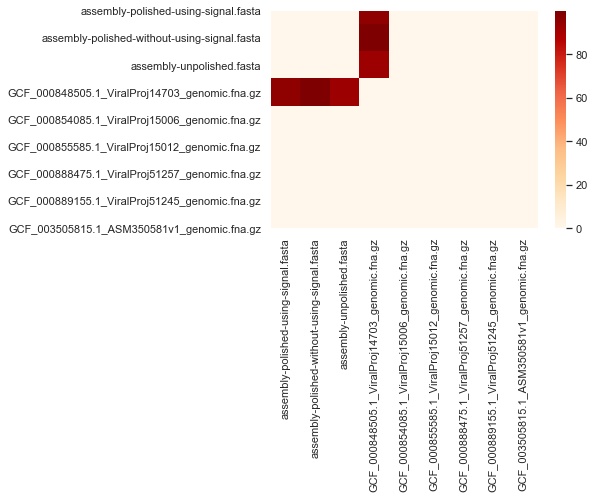

In [11]:
# plot the pairwise ANI scores as a heatmap
import os
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)

# convert triangular matrix to a regular one (https://github.com/marbl/Mash/issues/9#issuecomment-509837201)
def lower_triangle_to_full_matrix(filename):
    num_lines_in_file = sum(1 for line in open(filename))
    distances = []
    sample_names = []

    with open(filename) as f:
        next(f) # skip sample count line
        for line in f:
            elements = line.strip().split('\t')
            for i, e in enumerate(elements):
                if e == 'NA':
                    elements[i] = 0.0
            elements[0] = os.path.basename(elements[0])
            sample_names.append(elements[0])
            row = [float(e) for e in elements[1:]]
            row.extend([0.0] * (num_lines_in_file-1-len(row)))
            distances.append(row)
        np_array = np.asarray(distances)
        index_upper = np.triu_indices(num_lines_in_file-1)
        np_array[index_upper] = np_array.T[index_upper]
        return pd.DataFrame(np_array, columns=sample_names, index=sample_names)

df = lower_triangle_to_full_matrix('tmp/fastani-out.tab.matrix')

sns.heatmap(df, cmap="OrRd")

> the closest reference genome is `GCF_000848505.1_ViralProj14703_genomic.fna.gz` (which is thankfully Mayinga)

* compare the each assembly to this reference genome

In [12]:
!find ./ -name GCF_000848505.1_ViralProj14703_genomic.fna.gz -exec gunzip -c {} + > tmp/ref-genome.fasta
!nucdiff tmp/ref-genome.fasta tmp/mayinga-assembly/assembly-unpolished.fasta tmp/nucdiff-out unpolished
!nucdiff tmp/ref-genome.fasta tmp/mayinga-assembly/assembly-polished-using-signal.fasta tmp/nucdiff-out polished-with-signal
!nucdiff tmp/ref-genome.fasta tmp/mayinga-assembly/assembly-polished-without-using-signal.fasta tmp/nucdiff-out polished-without-signal


Run NUCmer...

1: PREPARING DATA
2,3: RUNNING mummer AND CREATING CLUSTERS
# reading input file "/Users/willrowe/Desktop/nanoporeSignal/signal-check/tmp/nucdiff-out/unpolished.ntref" of length 18960
# construct suffix tree for sequence of length 18960
# (maximum reference length is 536870908)
# (maximum query length is 4294967295)
# CONSTRUCTIONTIME //anaconda3/envs/notebook-analysis/opt/mummer-3.23/mummer /Users/willrowe/Desktop/nanoporeSignal/signal-check/tmp/nucdiff-out/unpolished.ntref 0.00
# reading input file "/Users/willrowe/Desktop/nanoporeSignal/signal-check/tmp/mayinga-assembly/assembly-unpolished.fasta" of length 18617
# matching query-file "/Users/willrowe/Desktop/nanoporeSignal/signal-check/tmp/mayinga-assembly/assembly-unpolished.fasta"
# against subject-file "/Users/willrowe/Desktop/nanoporeSignal/signal-check/tmp/nucdiff-out/unpolished.ntref"
# COMPLETETIME //anaconda3/envs/notebook-analysis/opt/mummer-3.23/mummer /Users/willrowe/Desktop/nanoporeSignal/signal-check/tmp

The difference detection inside fragments step is complete

The difference detection between fragments step is complete


In [13]:
# nucdiff will report SNPs, InDels and rearrangements, as well as the breadth of coverage, compared to the reference
import glob

nucdiffFiles = [i for i in glob.glob('tmp/nucdiff-out/results/*.out')]

dfs = []
for f in nucdiffFiles:
    fn = os.path.basename(f).replace('_stat.out', '')
    df = pd.read_csv(f, sep='\t', header=None, index_col=0)
    df.columns = [fn]
    dfs.append(df)
combined = pd.concat(dfs, axis=1, sort=False)

print(combined.loc[ ['Total number', 'Insertions', 'Deletions', 'Substitutions'] , : ])

print(combined.loc[ ['Uncovered ref regions num', 'Uncovered ref regions len'] , : ])

               polished-with-signal  polished-without-signal  unpolished
0                                                                       
Total number                  974.0                      8.0      1466.0
Insertions                    266.0                      3.0       347.0
Deletions                     323.0                      3.0       499.0
Substitutions                 385.0                      2.0       620.0
                           polished-with-signal  polished-without-signal  \
0                                                                          
Uncovered ref regions num                   2.0                      2.0   
Uncovered ref regions len                  67.0                     65.0   

                           unpolished  
0                                      
Uncovered ref regions num         2.0  
Uncovered ref regions len        67.0  
